In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/My\ Drive

/content/drive/My Drive


In [3]:
ls

 174616_394223_bundle_archive.zip   best_modellstmmulti.01-0.68.h5
 AQ_paper_V1.docx                   best_modellstmmulti.01-0.84.h5
 best_model.01-0.65.h5              best_modellstmmulti.02-0.48.h5
 best_model.01-0.66.h5              best_modellstmmulti.02-0.54.h5
 best_model.01-0.69.h5              best_modellstmmulti.02-0.60.h5
 best_model.02-0.63.h5              best_modellstmmulti.02-0.63.h5
 best_model.02-0.67.h5              best_modellstmmulti.02-0.67.h5
 best_model.03-0.61.h5              best_modellstmmulti.02-0.80.h5
 best_model.03-0.62.h5              best_modellstmmulti.03-0.46.h5
 best_model.03-0.66.h5              best_modellstmmulti.03-0.49.h5
 best_model.04-0.60.h5              best_modellstmmulti.03-0.58.h5
 best_model.04-0.61.h5              best_modellstmmulti.03-0.60.h5
 best_model.04-0.64.h5              best_modellstmmulti.03-0.66.h5
 best_model.05-0.59.h5              best_modellstmmulti.03-0.77.h5
 best_model.05-0.60.h5              best_modellstmmulti.04-0.4

In [4]:
!unzip 174616_394223_bundle_archive.zip

Archive:  174616_394223_bundle_archive.zip
   creating: 174616_394223_bundle_archive/
  inflating: 174616_394223_bundle_archive/index.html  
  inflating: 174616_394223_bundle_archive/KDDTest+.arff  
  inflating: 174616_394223_bundle_archive/KDDTest+.txt  
  inflating: 174616_394223_bundle_archive/KDDTest-21.arff  
  inflating: 174616_394223_bundle_archive/KDDTest-21.txt  
  inflating: 174616_394223_bundle_archive/KDDTest1.jpg  
  inflating: 174616_394223_bundle_archive/KDDTrain+.arff  
  inflating: 174616_394223_bundle_archive/KDDTrain+.txt  
  inflating: 174616_394223_bundle_archive/KDDTrain+_20Percent.arff  
  inflating: 174616_394223_bundle_archive/KDDTrain+_20Percent.txt  
  inflating: 174616_394223_bundle_archive/KDDTrain1.jpg  
   creating: 174616_394223_bundle_archive/nsl-kdd/
  inflating: 174616_394223_bundle_archive/nsl-kdd/index.html  
  inflating: 174616_394223_bundle_archive/nsl-kdd/KDDTest+.arff  
  inflating: 174616_394223_bundle_archive/nsl-kdd/KDDTest+.txt  
  inflating

In [5]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras.datasets import imdb
from keras import backend as K
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils
import numpy as np
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error
                              ,mean_absolute_error)
from sklearn import metrics
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

from warnings import filterwarnings
filterwarnings('ignore')

In [6]:
datatrain='/content/drive/My Drive/174616_394223_bundle_archive/KDDTrain+.txt'
datatest='/content/drive/My Drive/174616_394223_bundle_archive/KDDTest+.txt'
train = pd.read_csv(datatrain, header=None)
test = pd.read_csv(datatest, header=None)
train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184,25,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,8,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


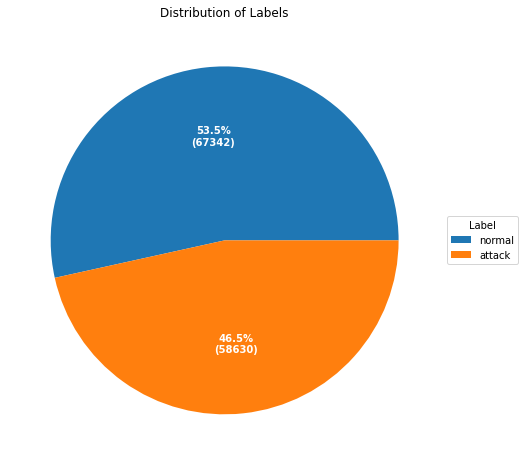

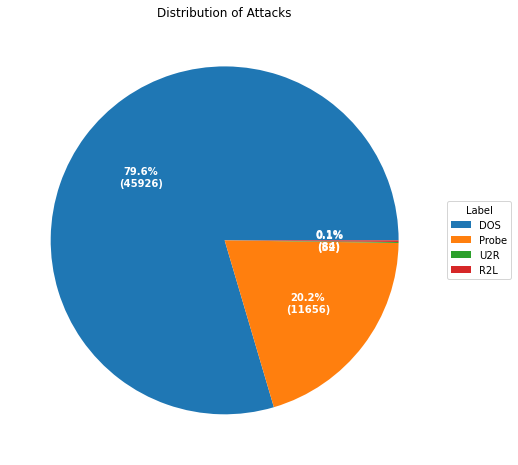

In [7]:
"""These data sets contain the records of the internet traffic seen by a simple intrusion detection network and are the ghosts of the traffic encountered by a real IDS and just the traces of its existence remains. The data set contains 43 features per record, with 41 of the features referring to the traffic input itself and the last two are labels (whether it is a normal or attack) and Score (the severity of the traffic input itself).

A description of each feature and a breakdown of the data set can be seen in the google spreadsheet here.

Let's explore the label (column index 41)
"""

train.iloc[:,41].value_counts(dropna=False)

test.iloc[:,41].value_counts(dropna=False)



"""Data Cleaning and Visualization
Our aim here is to check whether an intrusion is detected or not. We do not go deeper into the classification of the attacks. Thus, we add a 'target' column which maps label 'normal' to 0 and any intrusion as 1. We then plot a pie chart to visualize this distribution.
"""

train['target'] = train.iloc[:,41].apply(lambda x: 0 if x == 'normal' else 1)
test['target'] = test.iloc[:,41].apply(lambda x: 0 if x == 'normal' else 1)
data = train['target'].value_counts()
lab = ['normal','attack']
data

# Commented out IPython magic to ensure Python compatibility.
# %matplotlib inline
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(aspect="equal"))
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))
ax.legend(wedges, lab,
          title="Label",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Distribution of Labels")

plt.show()

DOS = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','upstorm','worm']
Probe = ['ipsweep','nmap','mscan','portsweep','saint','satan']
U2R = ['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm']
R2L = ['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','Snmpgetattack','spy','snmpguess','warzclient','warzmaster','xlock','xsnoop']
count = {'DOS':0, 'Probe':0, 'U2R':0, 'R2L':0}
for attack in train[41]:
    if attack in DOS:
        count['DOS'] += 1
    elif attack in Probe:
        count['Probe'] += 1
    elif attack in U2R:
        count['U2R'] += 1
    elif attack in R2L:
        count['R2L'] += 1
count

data = list(count.values())
lab = list(count.keys())
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(aspect="equal"))
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))
ax.legend(wedges, lab,
          title="Label",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Distribution of Attacks")

plt.show()
data

"""Column 42, specifies the severity of the attack. For the intrusion detection system, the severity of an attack is irrelevant as any attack can be sever. It does not help in classifying whether there was an attack or not, or which type of attack was observed. Thus the column 42 is removed from the data.

Initially, the model is supposed to detect whether there has been an attack or not (detection). Only then should it learn to classify the attacks. Thus the column 41 is removed for the initial model.
"""

train.drop(columns=[41,42], inplace=True)
test.drop(columns=[41,42], inplace=True)
train

"""All the columns that are textual i.e. strings, are encoded to numerics for the understanding of the model. Since all the models applied cannot inherently handle textual data. A LabelEncoder is fit on the train data. The same encodings are used for the test data as well to maintain uniformity."""

categorical = [1,2,3]

encoder = LabelEncoder()
for col in categorical:
    train.iloc[:,col] = pd.Series(encoder.fit_transform(train.iloc[:,col]))
    test.iloc[:,col] = pd.Series(encoder.transform(test.iloc[:,col]))

"""As shown previously, the test set contains types of attacks which are not in the train set. Every attack has a different kind of signature. The model can learn the signature of a type of an attack and can thus detect it in future. But for those attacks whose signatures are not known might not always be detected by the model. To avoid such an issue, the two sets are combined and then randomly split into train and test set again.

The train set will be used to train the model and test set for testing the model on unseen data.
"""

train = pd.concat([train,test],axis=0)

X = train.drop(columns='target',axis=1)
y = train.target


In [8]:
# make dataset according to LSTM network
scaler = StandardScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(X))

X_train,X_test,y_train,y_test = train_test_split(scaled_X,y,random_state=10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

X_train=np.array(X_train)
X_test=np.array(X_test)
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
y_train=np.array(y_train)
y_test=np.array(y_test)

(111387, 41)
(37130, 41)
(111387,)
(37130,)


In [10]:
y_train_hotEC = np_utils.to_categorical(y_train, 2)
y_test_hotEC=np_utils.to_categorical(y_test, 2)
#input_shape=(time_steps, n_features))
# code for building an LSTM with 100 neurons and dropout. Runs for 50 epochs

model = Sequential()
model.add(LSTM(100, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.5))
#model.add(LSTM(100)) dramatically worse results
model.add(Dense(2, activation='sigmoid'))
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)
]

model.compile(loss='binary_crossentropy',
                optimizer='adam', metrics=['acc'])

BATCH_SIZE = 400
EPOCHS = 50

history = model.fit(X_train,
                      y_train_hotEC,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      callbacks=callbacks_list,
                      validation_split=0.2,
                      verbose=1)

Epoch 1/50
223/223 [==============================] - 2s 9ms/step - loss: 0.3626 - acc: 0.8809 - val_loss: 0.2358 - val_acc: 0.9064
Epoch 2/50
223/223 [==============================] - 2s 7ms/step - loss: 0.2072 - acc: 0.9140 - val_loss: 0.1814 - val_acc: 0.9238
Epoch 3/50
223/223 [==============================] - 2s 7ms/step - loss: 0.1525 - acc: 0.9374 - val_loss: 0.1446 - val_acc: 0.9359
Epoch 4/50
223/223 [==============================] - 2s 7ms/step - loss: 0.1276 - acc: 0.9494 - val_loss: 0.1063 - val_acc: 0.9571
Epoch 5/50
223/223 [==============================] - 2s 7ms/step - loss: 0.1449 - acc: 0.9457 - val_loss: 0.2087 - val_acc: 0.9226


{'loss': [0.3626049757003784, 0.20719866454601288, 0.1525062471628189, 0.1275923252105713, 0.1449064165353775], 'acc': [0.8809099197387695, 0.9139593243598938, 0.9373576045036316, 0.9493765830993652, 0.9456620812416077], 'val_loss': [0.23584672808647156, 0.1813851296901703, 0.14461113512516022, 0.1063271015882492, 0.20867660641670227], 'val_acc': [0.9064099192619324, 0.9238262176513672, 0.9358559846878052, 0.9570876955986023, 0.9225693345069885]}


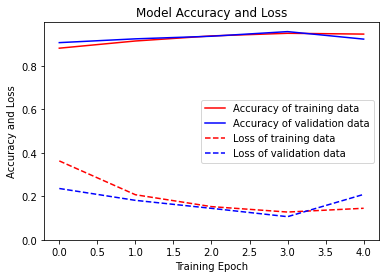

In [12]:
print(history.history)
plt.figure(figsize=(6, 4))
plt.plot(history.history['acc'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_acc'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()


In [13]:
# accuracy on test data
y_testEC= np_utils.to_categorical(y_test,2)

score = model.evaluate(X_test, y_testEC, verbose=1)

print('\nAccuracy on test data: %0.2f' % score[1])
print('\nLoss on test data: %0.2f' % score[0])

1161/1161 [==============================] - 4s 3ms/step - loss: 0.2114 - acc: 0.9224

Accuracy on test data: 0.92

Loss on test data: 0.21


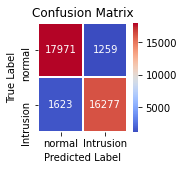

              precision    recall  f1-score   support

           0       0.92      0.93      0.93     19230
           1       0.93      0.91      0.92     17900

    accuracy                           0.92     37130
   macro avg       0.92      0.92      0.92     37130
weighted avg       0.92      0.92      0.92     37130



In [15]:
LABELS = ['normal','Intrusion']
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(2, 2))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

import numpy as np
import pandas as pd
import seaborn as sns
#y_pred_train = model.predict(X_train)
# Take the class with the highest probability from the train predictions
#max_y_pred_train = np.argmax(y_pred_train, axis=1)
#print(classification_report(y_train, max_y_pred_train))


y_pred_test = model.predict(X_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_testEC, axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test)

print(classification_report(max_y_test, max_y_pred_test))